# Connection to Trait Mapping

Our published research (*Lusk et al., Nature Communications 2026*) shows that crowdsourced observations enable global-scale plant trait mapping. Here we examine how India's GBIF data contributes to this effort.

In [1]:
import sys; sys.path.insert(0, ".")
from _shared import *
setup_plotting()

india_df = pd.read_parquet(CACHE_DIR / "india_df.parquet")

In [2]:
# Check how many Indian species have trait data
filtered_species = set(
    pd.read_parquet(
        FILTERED_GBIF_PATH,
        columns=["specieskey"],
    )
    .specieskey.astype(str)
    .unique()
)

india_species_all = india_df.query("taxonrank == 'SPECIES'").specieskey.unique()
india_species_set = set(str(s) for s in india_species_all)
matched = india_species_set & filtered_species

print(f"Unique species observed in India: {len(india_species_set):,}")
print(f"Species with TRY trait data (used in our study): {len(matched):,} ({len(matched)/len(india_species_set):.1%})")
print(f"Species WITHOUT trait data: {len(india_species_set) - len(matched):,}")
print(f"\nThese {len(matched):,} species with trait data enable India-specific")
print(f"trait map generation from citizen science observations.")

Unique species observed in India: 8,113
Species with TRY trait data (used in our study): 3,758 (46.3%)
Species WITHOUT trait data: 4,355

These 3,758 species with trait data enable India-specific
trait map generation from citizen science observations.


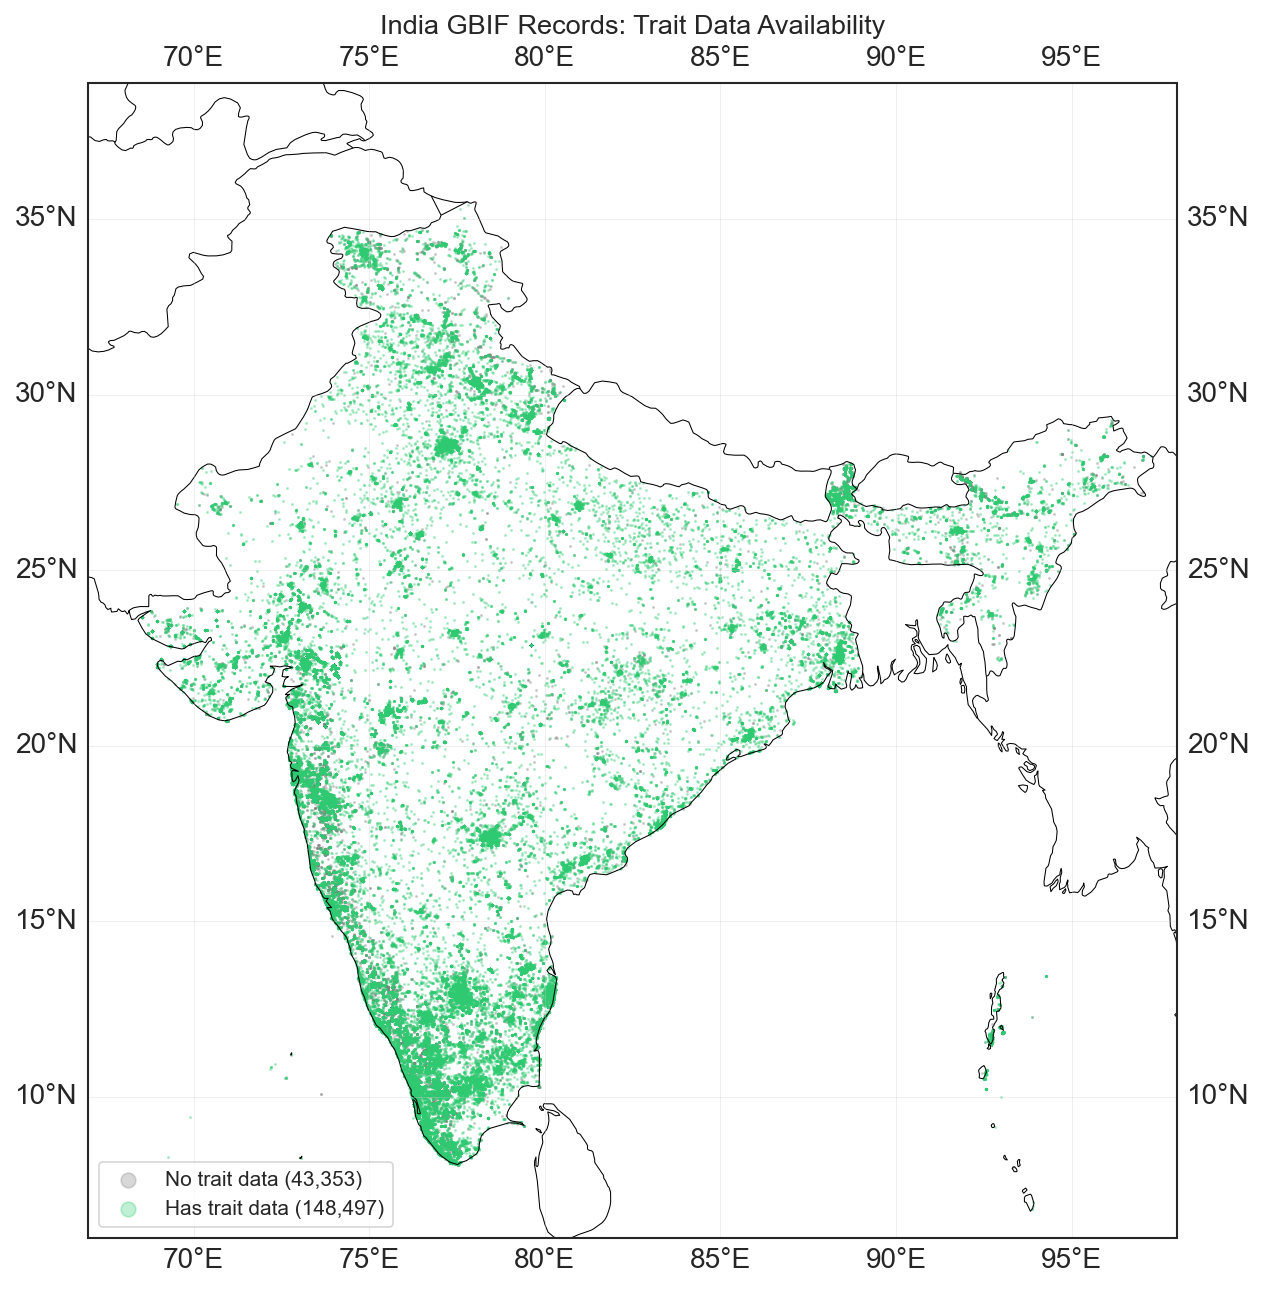

In [3]:
# Map of India colored by trait availability
india_sp_df = india_df.query("taxonrank == 'SPECIES'").copy()
india_sp_df["has_traits"] = india_sp_df.specieskey.astype(str).isin(matched)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([67, 98, 6, 38])
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

no_trait = india_sp_df.query("has_traits == False")
with_trait = india_sp_df.query("has_traits == True")

ax.scatter(
    no_trait.decimallongitude, no_trait.decimallatitude,
    s=0.5, alpha=0.3, c="gray",
    label=f"No trait data ({len(no_trait):,})",
    transform=ccrs.PlateCarree(),
)
ax.scatter(
    with_trait.decimallongitude, with_trait.decimallatitude,
    s=0.5, alpha=0.3, c="#2ecc71",
    label=f"Has trait data ({len(with_trait):,})",
    transform=ccrs.PlateCarree(),
)

ax.legend(markerscale=10, fontsize=10, loc="lower left")
ax.set_title("India GBIF Records: Trait Data Availability", fontsize=13)
ax.gridlines(draw_labels=True, linewidth=0.3, alpha=0.5)
plt.show()